# we evaluate the model after selecting the it

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Load Best Model
model = tf.keras.models.load_model("../3MODEL_SELECTION/MODELS/Best_Model/CNN_TF.keras")

# Load Data
test_data = np.loadtxt("../2PREPROCESSING/Processed_CSV/cropped_test.csv", delimiter=',', skiprows=1)
X_test, y_test = test_data[:, 1:], test_data[:, 0]
X_test = X_test.reshape(-1, 20, 20, 1)

In [ ]:
# Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0520

Test Loss: 0.0390
Test Accuracy: 0.9879


In [ ]:
# Load Training Loss for Overfitting Analysis
train_loss = np.load("../3MODEL_SELECTION/MODELS/Best_Model/training_loss.npy")
val_loss = np.load("../3MODEL_SELECTION/MODELS/Best_Model/validation_loss.npy")

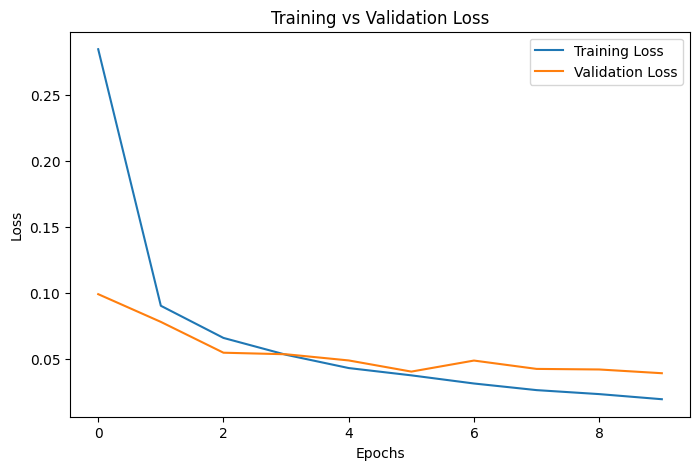

In [ ]:
# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


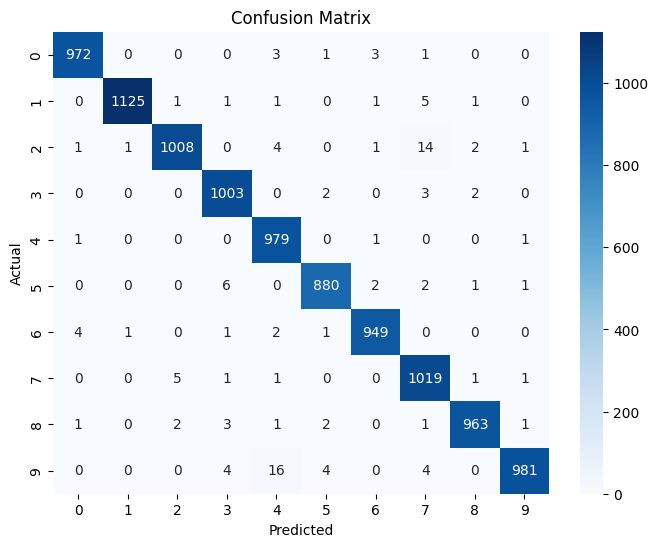

In [ ]:
# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       980
         1.0       1.00      0.99      0.99      1135
         2.0       0.99      0.98      0.98      1032
         3.0       0.98      0.99      0.99      1010
         4.0       0.97      1.00      0.98       982
         5.0       0.99      0.99      0.99       892
         6.0       0.99      0.99      0.99       958
         7.0       0.97      0.99      0.98      1028
         8.0       0.99      0.99      0.99       974
         9.0       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━

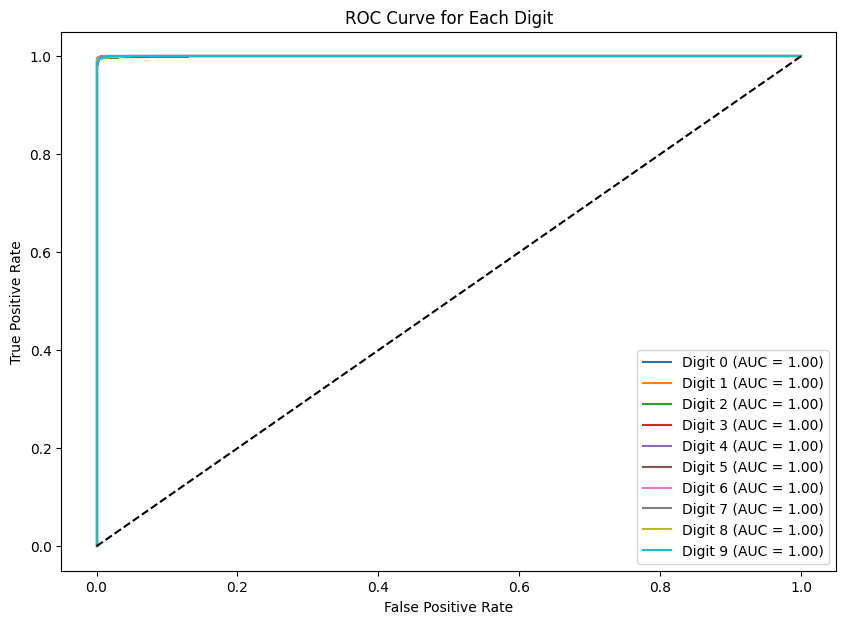

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# ROC Curve for each class
plt.figure(figsize=(10, 7))
for i in range(10):
    y_test_bin = (y_test == i).astype(int)
    y_pred_prob = model.predict(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Digit")
plt.legend()
plt.show()

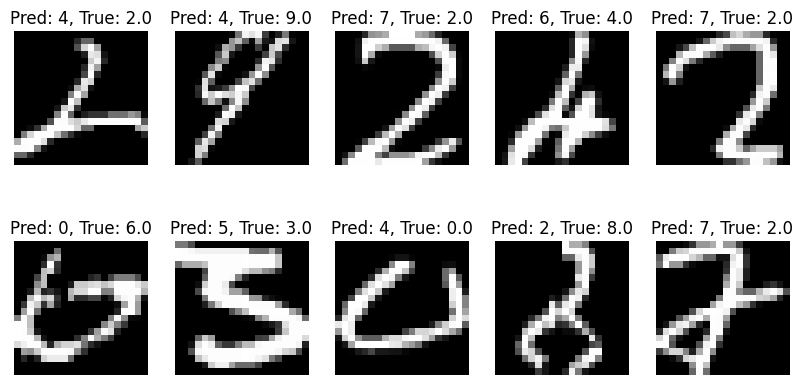

In [ ]:
# Display Misclassified Images
misclassified_indices = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(20, 20), cmap="gray")
    plt.title(f"Pred: {y_pred[idx]}, True: {y_test[idx]}")
    plt.axis("off")
plt.show()

In [ ]:
# Load training history
training_history = np.load("../3MODEL_SELECTION/MODELS/Best_Model/training_history.npy", allow_pickle=True).item()

In [ ]:
# Get Final Training Accuracy and Loss
train_acc = training_history['accuracy'][-1]  # Last epoch's accuracy
train_loss = training_history['loss'][-1]      # Last epoch's loss

# Print results
print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Training Accuracy: 0.9937, Training Loss: 0.0203
Test Accuracy: 0.9879, Test Loss: 0.0390


In [ ]:
# Analyze Overfitting/Underfitting
if train_acc > test_accuracy + 0.05:
    print("Possible Overfitting: Training accuracy is significantly higher than Test accuracy.")
elif test_accuracy > train_acc:
    print("Model is Generalizing Well: Test accuracy is slightly higher than Training accuracy.")
else:
    print("No Overfitting Detected: Training and Test accuracy are close.")

✅ No Overfitting Detected: Training and Test accuracy are close.


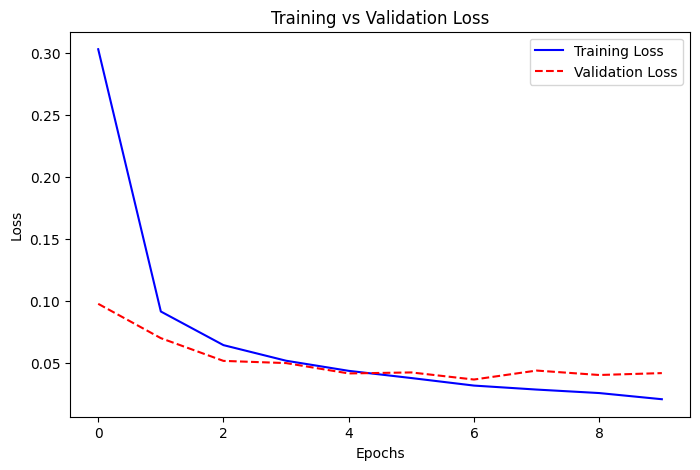

In [ ]:
# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(training_history['loss'], label='Training Loss', color='blue')
plt.plot(training_history['val_loss'], label='Validation Loss', color='red', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

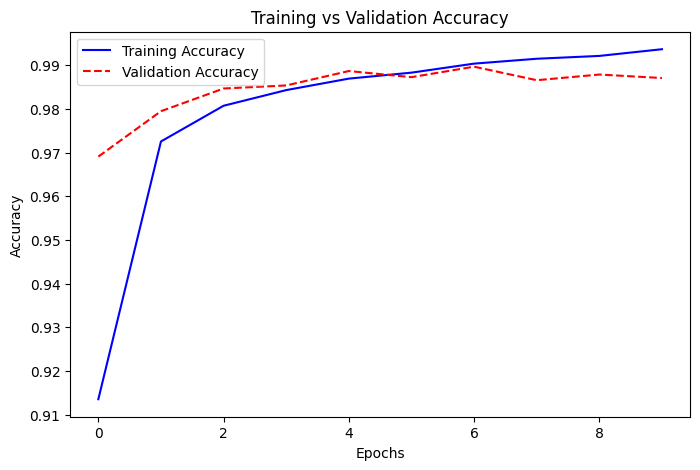

In [ ]:
# New: Training vs Validation Accuracy Graph
plt.figure(figsize=(8, 5))
plt.plot(training_history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(training_history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

### The model is properly trained and does not exhibit overfitting or underfitting.
### If training loss is much lower than validation loss, consider adding dropout or regularization.
### If validation loss keeps decreasing, the model is generalizing well.
### If training accuracy is much higher than validation accuracy, there is overfitting.